분류와 예측 두 가지가 있고. 의사결정과정을 트리 구조로 나타낸다

In [1]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

In [2]:
X.shape

(178, 13)

In [3]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
# 로지스틱회귀를 적용
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)
# 데이터 표준화 Scaled
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)
# 로지스틱회귀로 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
# 평가
lr.score(x_train_scaled,y_train), lr.score(x_test_scaled, y_test)

(1.0, 0.9777777777777777)

In [6]:
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(x_train_scaled,y_train)
# 평가
sgdc.score(x_train_scaled,y_train), sgdc.score(x_test_scaled, y_test)

(1.0, 0.9777777777777777)

In [7]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train), dt.score(x_test,y_test)

(1.0, 0.9555555555555556)

In [8]:
x_train.shape

(133, 13)

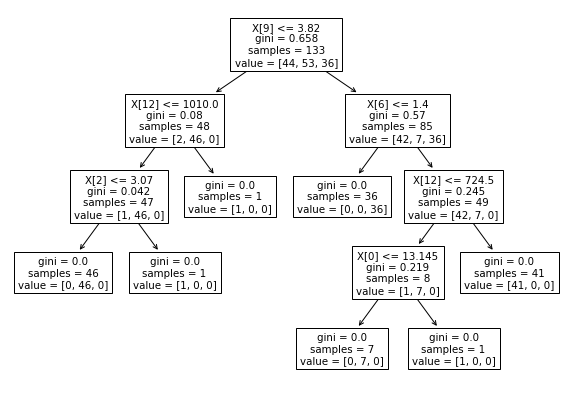

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [10]:
dt.feature_importances_

array([0.01998197, 0.        , 0.02235065, 0.        , 0.        ,
       0.        , 0.41589367, 0.        , 0.        , 0.40331707,
       0.        , 0.        , 0.13845664])

In [11]:
import numpy as np
np.argsort(dt.feature_importances_)[::-1]

array([ 6,  9, 12,  2,  0, 11, 10,  8,  7,  5,  4,  3,  1], dtype=int64)

In [12]:
help(np.sort)

Help on function sort in module numpy:

sort(a, axis=-1, kind=None, order=None)
    Return a sorted copy of an array.
    
    Parameters
    ----------
    a : array_like
        Array to be sorted.
    axis : int or None, optional
        Axis along which to sort. If None, the array is flattened before
        sorting. The default is -1, which sorts along the last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort or radix sort under the covers and, in general,
        the actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stable' option was added.
    
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A si

가지치기

0.9924812030075187 0.9555555555555556


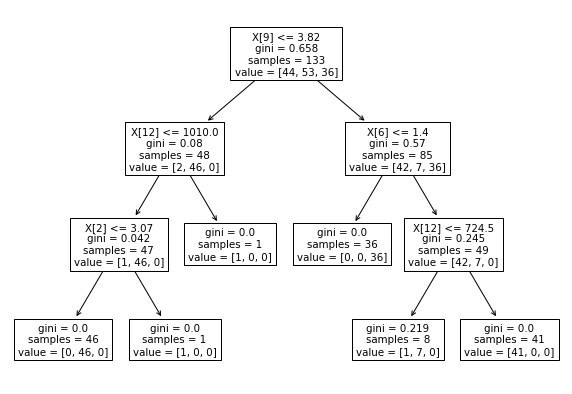

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train), dt.score(x_test,y_test) )

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


In [20]:
import zipfile

zip_file=zipfile.ZipFile("archive.zip")

zip_file.extractall()

In [18]:
# !unzip '/content/archive.zip'  # full path
# !unzip 'archive.zip'  # 상대경로

In [21]:
import pandas as pd
# wineQuality = pd.read_csv('/content/winequalityN.csv')
wineQuality = pd.read_csv('winequalityN.csv')
wineQuality

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
df2 = wineQuality.dropna()
df2.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
len(df2)

6463

In [24]:
X = df2.iloc[:,1:-1]
y = df2.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [25]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_train,y_train), tree.score(x_test,y_test)

(1.0, 0.5724009900990099)

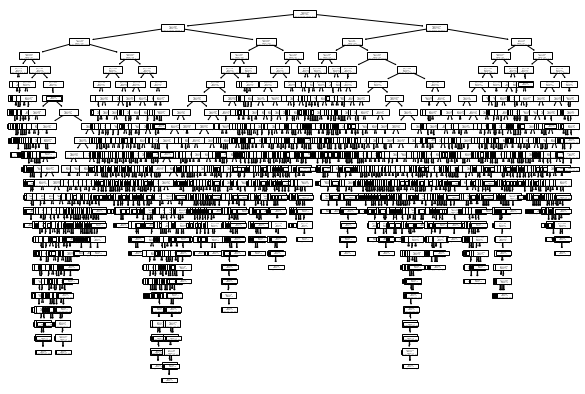

In [26]:
plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()

0.5403342273571281 0.49814356435643564


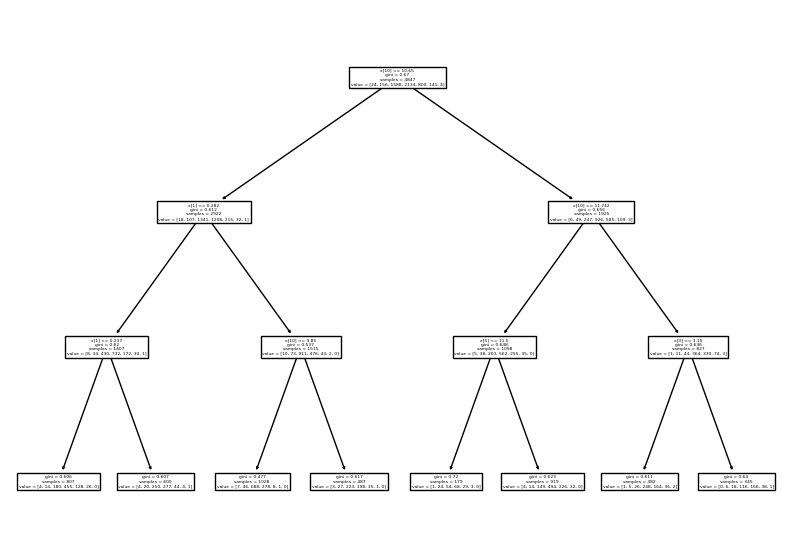

In [43]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)
print(tree.score(x_train,y_train), tree.score(x_test,y_test))

plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()